<a href="https://colab.research.google.com/github/riandigitalent/Digitalent-Kominfo_Pendalaman-Rest-API/blob/master/Submisiion%20dicoding%20ML%20entry%20level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile, os

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-01 10:19:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.53MB/s    in 43s     

2020-11-01 10:20:34 (7.15 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [16]:
data_zip = '/tmp/rockpaperscissors.zip'
data_ref = zipfile.ZipFile(data_zip, 'r')
data_ref.extractall('/tmp')
data_ref.close()

In [27]:
#split data
!pip install split-folders
import splitfolders  
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images',output="/tmp/rockpaperscissors/base_folder",
seed=1337, ratio=(.6, .4,))

Copying files: 2188 files [00:00, 3353.29 files/s]


In [30]:
base_dir = '/tmp/rockpaperscissors/base_folder'
os.listdir()

['.config', 'sample_data']

In [31]:
# membuat direktori train dan validation

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

os.listdir(base_dir)

['val', 'train']

In [34]:
os.listdir('/tmp/rockpaperscissors/base_folder/train')

['paper', 'rock', 'scissors']

In [35]:
os.listdir('/tmp/rockpaperscissors/base_folder/train')

['paper', 'rock', 'scissors']

In [36]:
# membuat direktori paper  pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
     
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')
     
# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')
     
# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')

In [39]:
train_generator = train_datagen.flow_from_directory(
            train_dir,  # direktori data latih
            target_size=(150, 150),  #  resolusi jadi 150x150 piksel
            batch_size=32,
            class_mode='categorical')
     
validation_generator = test_datagen.flow_from_directory(
            validation_dir, # direktori data validasi
            target_size=(150, 150), # resolusi jadi 150x150 piksel
            batch_size=32, # 
            class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [40]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [41]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 43s - loss: 1.1085 - accuracy: 0.3525 - val_loss: 1.0642 - val_accuracy: 0.4062
Epoch 2/20
25/25 - 42s - loss: 0.8585 - accuracy: 0.6237 - val_loss: 0.6222 - val_accuracy: 0.7750
Epoch 3/20
25/25 - 43s - loss: 0.4600 - accuracy: 0.8363 - val_loss: 0.3374 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 42s - loss: 0.2791 - accuracy: 0.9162 - val_loss: 0.2408 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 43s - loss: 0.1649 - accuracy: 0.9475 - val_loss: 0.2428 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 42s - loss: 0.2132 - accuracy: 0.9300 - val_loss: 0.1905 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 42s - loss: 0.2042 - accuracy: 0.9300 - val_loss: 0.1647 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 43s - loss: 0.1823 - accuracy: 0.9350 - val_loss: 0.1191 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 46s - loss: 0.1476 - accuracy: 0.9513 - val_loss: 0.1158 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 42s - loss: 0.1254 - accuracy: 0.9650 - val_loss: 0.1077 - val_accuracy: 0.9625
Epoch 11/

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png
rock


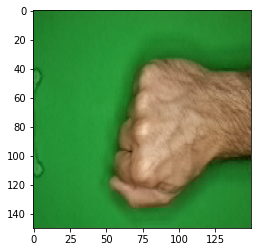

In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S.png
0Flw60Z2MAWWKn6S.png
scissors


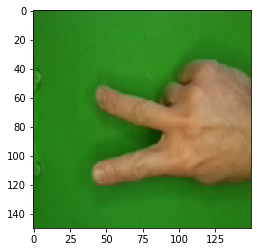

In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving 0cb6cVL8pkfi4wF6.png to 0cb6cVL8pkfi4wF6.png
0cb6cVL8pkfi4wF6.png
paper


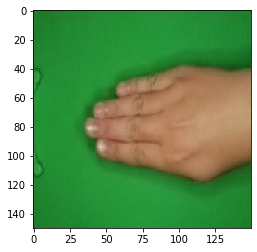

In [47]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Rian yunandar

```
# user email dicoding :rian3010@gmail.com
```